In [16]:
import joblib
import numpy as np
import pandas as pd
from pathlib import Path
from PIL import Image
import os
import random
from sklearn.ensemble import RandomForestClassifier
import time

from dvclive import Live

## Prepare data

In [27]:
DATA_PATH = 'data/features.csv'

Path.mkdir('data', parents=True, exist_ok=True)

In [28]:
# Number of rows
n_rows = 100
n_cols = 5

# Generate random float data for features
feature_data = np.random.rand(n_rows, n_cols)

# Generate random binary data for the target
target_data = np.random.randint(2, size=n_rows)

# Create a DataFrame for features
df_features = pd.DataFrame(feature_data, columns=[f'feature_{i}' for i in range(1, n_cols + 1)])

# Add the target column to the DataFrame
df_features['target'] = target_data

# Save the DataFrame to a CSV file
df_features.to_csv(DATA_PATH, index=False)

In [29]:
df_features.head(3)

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.220606,0.468985,0.408419,0.222404,0.500008,1
1,0.043438,0.181654,0.207948,0.254497,0.565000,0
2,0.542762,0.724656,0.678367,0.818389,0.037344,0


## Train model

In [44]:
MODEL_PATH = "manifests/manifests.pkl"

Path.mkdir('manifests', parents=True, exist_ok=True)

In [45]:
print("Training Random Forest model - START")

# Load the prepared data
data = pd.read_csv(DATA_PATH)

# Extract features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Train the model
model = RandomForestClassifier() # Example model
model.fit(X, y)

# Simulate GridSearch hyperparameter tuning
errors = []
max_leaf_nodes = [5, 50, 500, 5000]
for nodes in max_leaf_nodes:
    error = random.random()
    errors.append(error)
    print(f"Max leaf nodes: {nodes}  \t ➡ Mean Absolute Error:  {error}")

# Create a DataFrame from the lists
datapoints = pd.DataFrame({
    'Max Leaf Nodes': max_leaf_nodes,
    'Error': errors
})

# Save the trained model
joblib.dump(model, MODEL_PATH)

Training Random Forest model - START
Max leaf nodes: 5  	 ➡ Mean Absolute Error:  0.18665539779193097
Max leaf nodes: 50  	 ➡ Mean Absolute Error:  0.10377360132555069
Max leaf nodes: 500  	 ➡ Mean Absolute Error:  0.020045744809592425
Max leaf nodes: 5000  	 ➡ Mean Absolute Error:  0.18200482531564566


['manifests/manifests.pkl']

## Log metrics and Artifacts

In [46]:
LIVE_DIR = 'dvclive' # default

# DVC Report

metrics.json

|     mae |   segment_A.f1 |   step |
|---------|----------------|--------|
| 11.0103 |        15.1292 |     19 |

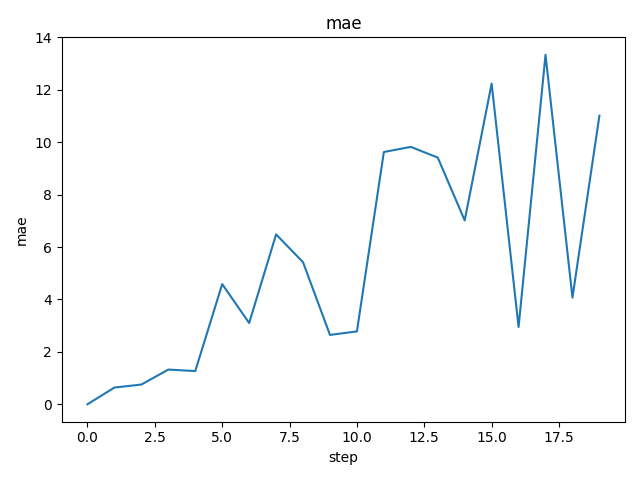

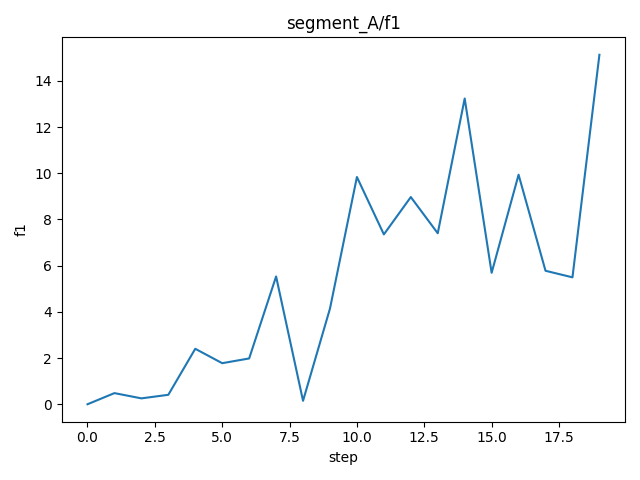



/Users/mikhailrozhkov/.pyenv/versions/3.11.6/lib/python3.11/site-packages/dvc_render/vega.py:169: UserWarning: `generate_markdown` can only be used with `LinearTemplate`
  warn("`generate_markdown` can only be used with `LinearTemplate`")  # noqa: B028
	gen-2024/dvc.lock, gen-2024/olddvc.yaml, gen-2024/README.md, gen-2024/models/.gitignore, gen-2024/models/model_LR.pkl.dvc, gen-2024/models/model_RF_new.pkl.dvc, gen-2024/models/model_RF.pkl.dvc, gen-2024/dvclive/metrics.json, gen-2024/data/.gitignore, gen-2024/reports/.gitignore, gen-2024/src/train_rf.py, gen-2024/src/prepare_data.py, gen-2024/src/train_lr.py, gen-2024/src/evaluate_models.py


Pipeline - bio-1023 - COMPLETE


In [47]:

EPOCHS = 20

with Live(dir=LIVE_DIR, 
          report='notebook') as live:

    # Log metrics in multiple epocs 
    for i in range(EPOCHS):
        live.log_metric("mae", i * random.random())
        live.log_metric("segment_A/f1", i * random.random())
        live.next_step()
        time.sleep(1)

    # Log a plot with datapoints 
    live.log_plot(
        "errors_vs_leafs",
        datapoints,
        x="Max Leaf Nodes",
        y="Error",
        template="simple",
        title="Errors vs Max Leaf Nodes")

    # Log Model / Manifest 
    live.log_artifact(
        path=MODEL_PATH,
        type="model",
        name="manifest",
        labels=["bio-1023"],
    )
    
    # Log a Dataset Artifact / Manifest 
    live.log_artifact(
        path=DATA_PATH,
        type="dataset",
        name="data-bio-1023",
        labels=["bio-1023"],
        meta=[{'columns': data.columns.to_list()}]
    )
    
print("Pipeline - bio-1023 - COMPLETE")
